In [1]:
import pandas as pd

# Load the datasets
df_day = pd.read_csv(r'C:\Users\salin\Desktop\ml\New folder (2)\day.csv')
df_hour = pd.read_csv(r'C:\Users\salin\Desktop\ml\New folder (2)\hour.csv')

# Display the first few rows of each dataframe
print(df_day.head())
print(df_hour.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [16]:
# Check for missing values in the day dataset
missing_values_day = df_day.isnull().sum()
print("Missing values in day dataset:\n", missing_values_day)

# Check for missing values in the hour dataset
missing_values_hour = df_hour.isnull().sum()
print("Missing values in hour dataset:\n", missing_values_hour)

Missing values in day dataset:
 instant         0
dteday          0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
season_2        0
season_3        0
season_4        0
yr_1            0
mnth_2          0
mnth_3          0
mnth_4          0
mnth_5          0
mnth_6          0
mnth_7          0
mnth_8          0
mnth_9          0
mnth_10         0
mnth_11         0
mnth_12         0
holiday_1       0
weekday_1       0
weekday_2       0
weekday_3       0
weekday_4       0
weekday_5       0
weekday_6       0
workingday_1    0
weathersit_2    0
weathersit_3    0
dtype: int64
Missing values in hour dataset:
 instant         0
dteday          0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
season_2        0
season_3        0
season_4        0
yr_1            0
mnth_2          0
mnth_3          0
mnth_4          0
mnth_5          0
mnth

Day Dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode categorical variables for day dataset
categorical_features_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_day = pd.get_dummies(df_day, columns=categorical_features_day, drop_first=True)

# Normalize continuous variables for day dataset
continuous_features_day = ['temp', 'atemp', 'hum', 'windspeed']
scaler_day = StandardScaler()
df_day[continuous_features_day] = scaler_day.fit_transform(df_day[continuous_features_day])

# Define features (X) and target (y) for day dataset
X_day = df_day.drop(columns=['cnt', 'instant', 'dteday', 'casual', 'registered'])
y_day = df_day['cnt']

# Split the data into training and testing sets for day dataset
X_train_day, X_test_day, y_train_day, y_test_day = train_test_split(X_day, y_day, test_size=0.2, random_state=42)


Hour Dataset

In [3]:
# One-hot encode categorical variables for hour dataset
categorical_features_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
df_hour = pd.get_dummies(df_hour, columns=categorical_features_hour, drop_first=True)

# Normalize continuous variables for hour dataset
continuous_features_hour = ['temp', 'atemp', 'hum', 'windspeed']
scaler_hour = StandardScaler()
df_hour[continuous_features_hour] = scaler_hour.fit_transform(df_hour[continuous_features_hour])

# Define features (X) and target (y) for hour dataset
X_hour = df_hour.drop(columns=['cnt', 'instant', 'dteday', 'casual', 'registered'])
y_hour = df_hour['cnt']

# Split the data into training and testing sets for hour dataset
X_train_hour, X_test_hour, y_train_hour, y_test_hour = train_test_split(X_hour, y_hour, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit the model for day dataset
model_day = LinearRegression()
model_day.fit(X_train_day, y_train_day)

# Predict on the test set for day dataset
y_pred_day = model_day.predict(X_test_day)

# Calculate errors for day dataset
mae_day = mean_absolute_error(y_test_day, y_pred_day)
mse_day = mean_squared_error(y_test_day, y_pred_day)
rmse_day = np.sqrt(mse_day)

print(f"Day Dataset - Mean Absolute Error: {mae_day}")
print(f"Day Dataset - Mean Squared Error: {mse_day}")
print(f"Day Dataset - Root Mean Squared Error: {rmse_day}")


Day Dataset - Mean Absolute Error: 583.019758830069
Day Dataset - Mean Squared Error: 634351.3615248952
Day Dataset - Root Mean Squared Error: 796.4617765623753


In [5]:
# Fit the model for hour dataset
model_hour = LinearRegression()
model_hour.fit(X_train_hour, y_train_hour)

# Predict on the test set for hour dataset
y_pred_hour = model_hour.predict(X_test_hour)

# Calculate errors for hour dataset
mae_hour = mean_absolute_error(y_test_hour, y_pred_hour)
mse_hour = mean_squared_error(y_test_hour, y_pred_hour)
rmse_hour = np.sqrt(mse_hour)

print(f"Hour Dataset - Mean Absolute Error: {mae_hour}")
print(f"Hour Dataset - Mean Squared Error: {mse_hour}")
print(f"Hour Dataset - Root Mean Squared Error: {rmse_hour}")


Hour Dataset - Mean Absolute Error: 74.10532638739653
Hour Dataset - Mean Squared Error: 10089.567073286253
Hour Dataset - Root Mean Squared Error: 100.44683704968641


In [6]:
comparison_day = pd.DataFrame({'Actual': y_test_day, 'Predicted': y_pred_day})
print(comparison_day.head())


     Actual    Predicted
703    6606  5922.206323
33     1550  1350.383612
300    3747  3508.157826
456    6041  4716.926645
633    7538  7412.436270


In [7]:
comparison_hour = pd.DataFrame({'Actual': y_test_hour, 'Predicted': y_pred_hour})
print(comparison_hour.head())


       Actual   Predicted
12830     425  449.006051
8688       88  162.440351
7091        4    5.112226
12230     526  432.135663
431        13  -68.770587


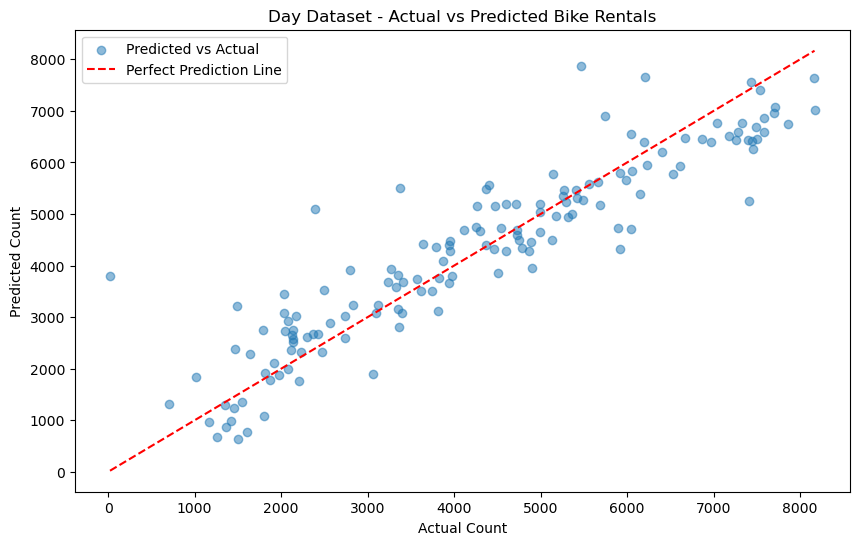

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting for day dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_test_day, y_pred_day, alpha=0.5, label='Predicted vs Actual')

# Plot the perfect prediction line
min_val = min(min(y_test_day), min(y_pred_day))
max_val = max(max(y_test_day), max(y_pred_day))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Day Dataset - Actual vs Predicted Bike Rentals")
plt.legend()
plt.show()


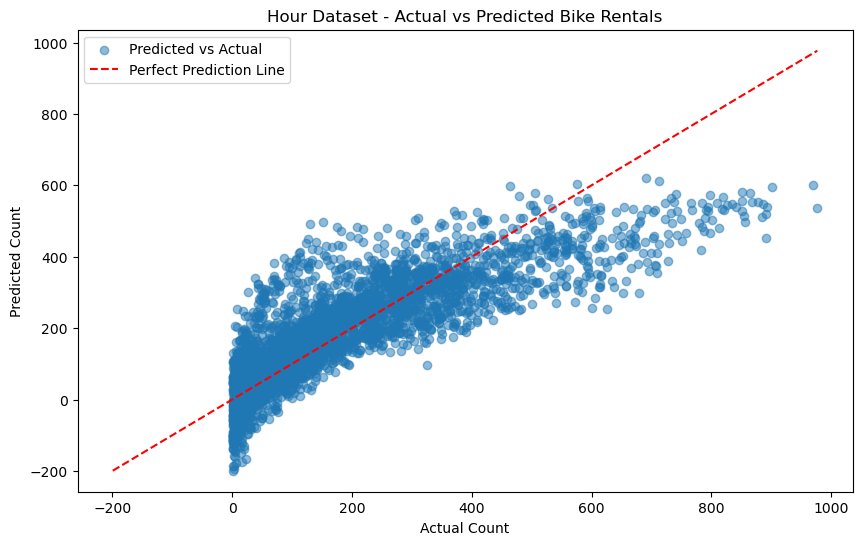

In [19]:
# Plotting for hour dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_test_hour, y_pred_hour, alpha=0.5, label='Predicted vs Actual')

# Plot the perfect prediction line
min_val = min(min(y_test_hour), min(y_pred_hour))
max_val = max(max(y_test_hour), max(y_pred_hour))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Hour Dataset - Actual vs Predicted Bike Rentals")
plt.legend()
plt.show()


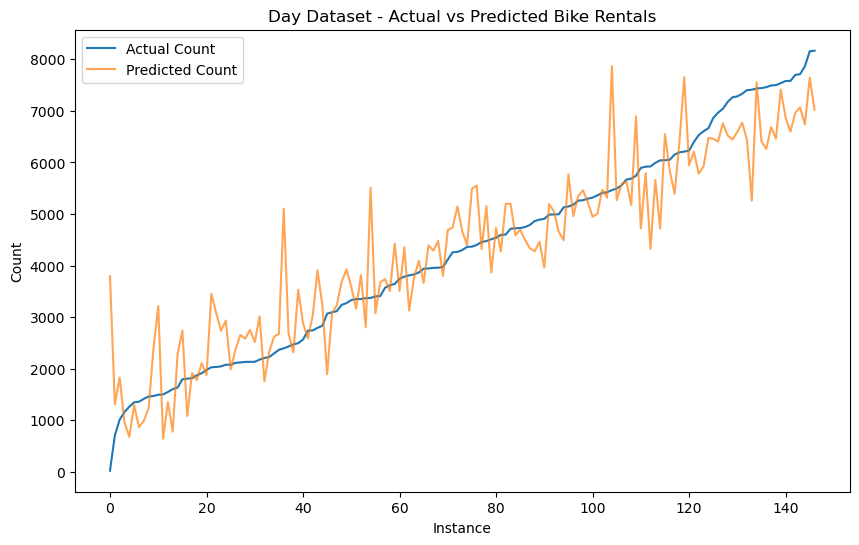

In [20]:
# Sort the actual and predicted values
y_test_sorted_day = y_test_day.reset_index(drop=True).sort_values()
y_pred_sorted_day = y_pred_day[np.argsort(y_test_day.values)]

# Plotting for day dataset
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted_day.values, label='Actual Count')
plt.plot(y_pred_sorted_day, label='Predicted Count', alpha=0.7)
plt.xlabel('Instance')
plt.ylabel('Count')
plt.title('Day Dataset - Actual vs Predicted Bike Rentals')
plt.legend()
plt.show()

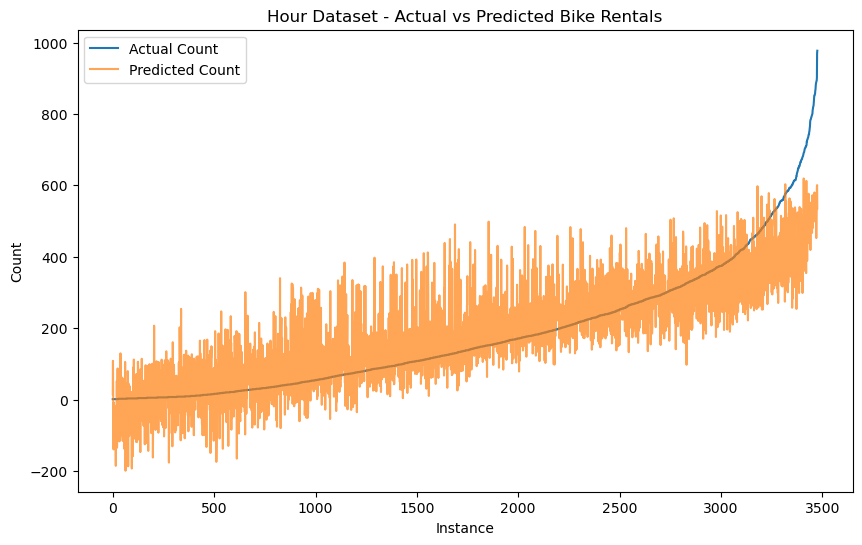

In [21]:
# Sort the actual and predicted values
y_test_sorted_hour = y_test_hour.reset_index(drop=True).sort_values()
y_pred_sorted_hour = y_pred_hour[np.argsort(y_test_hour.values)]

# Plotting for hour dataset
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted_hour.values, label='Actual Count')
plt.plot(y_pred_sorted_hour, label='Predicted Count', alpha=0.7)
plt.xlabel('Instance')
plt.ylabel('Count')
plt.title('Hour Dataset - Actual vs Predicted Bike Rentals')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2 penalty) for day dataset
ridge_model_day = Ridge(alpha=1.0)
ridge_model_day.fit(X_train_day, y_train_day)
ridge_pred_day = ridge_model_day.predict(X_test_day)
ridge_mae_day = mean_absolute_error(y_test_day, ridge_pred_day)
ridge_mse_day = mean_squared_error(y_test_day, ridge_pred_day)
ridge_rmse_day = np.sqrt(ridge_mse_day)

print("Day Dataset - Ridge Regression")
print(f"Mean Absolute Error: {ridge_mae_day}")
print(f"Mean Squared Error: {ridge_mse_day}")
print(f"Root Mean Squared Error: {ridge_rmse_day}")

# Lasso Regression (L1 penalty) for day dataset
lasso_model_day = Lasso(alpha=1.0)
lasso_model_day.fit(X_train_day, y_train_day)
lasso_pred_day = lasso_model_day.predict(X_test_day)
lasso_mae_day = mean_absolute_error(y_test_day, lasso_pred_day)
lasso_mse_day = mean_squared_error(y_test_day, lasso_pred_day)
lasso_rmse_day = np.sqrt(lasso_mse_day)

print("Day Dataset - Lasso Regression")
print(f"Mean Absolute Error: {lasso_mae_day}")
print(f"Mean Squared Error: {lasso_mse_day}")
print(f"Root Mean Squared Error: {lasso_rmse_day}")


Day Dataset - Ridge Regression
Mean Absolute Error: 586.513686187266
Mean Squared Error: 638860.9369461982
Root Mean Squared Error: 799.2877685453458
Day Dataset - Lasso Regression
Mean Absolute Error: 586.5201286493088
Mean Squared Error: 639739.3845454367
Root Mean Squared Error: 799.8370987553883


In [11]:
# Coefficients comparison for day dataset
coefficients_day = pd.DataFrame({
    'Feature': X_day.columns,
    'Linear Regression': model_day.coef_,
    'Ridge Regression': ridge_model_day.coef_,
    'Lasso Regression': lasso_model_day.coef_
})

print(coefficients_day)


         Feature  Linear Regression  Ridge Regression  Lasso Regression
0           temp         692.081206        686.788112        758.192867
1          atemp         197.062743        249.457117        183.638875
2            hum        -205.198966       -221.760249       -213.986154
3      windspeed        -198.668306       -203.819156       -200.344017
4       season_2         951.858211        911.929942       1010.932853
5       season_3         819.071721        719.869328        798.307058
6       season_4        1654.242956       1537.769856       1598.357959
7           yr_1        1981.834582       1964.223400       1972.099786
8         mnth_2          79.776198         25.446185          4.063971
9         mnth_3         578.428177        498.933271        450.772156
10        mnth_4         290.190864        224.535426        104.761665
11        mnth_5         540.876304        453.298010        329.641089
12        mnth_6         313.362932        223.095859         99

In [12]:
# Ridge Regression (L2 penalty) for hour dataset
ridge_model_hour = Ridge(alpha=1.0)
ridge_model_hour.fit(X_train_hour, y_train_hour)
ridge_pred_hour = ridge_model_hour.predict(X_test_hour)
ridge_mae_hour = mean_absolute_error(y_test_hour, ridge_pred_hour)
ridge_mse_hour = mean_squared_error(y_test_hour, ridge_pred_hour)
ridge_rmse_hour = np.sqrt(ridge_mse_hour)

print("Hour Dataset - Ridge Regression")
print(f"Mean Absolute Error: {ridge_mae_hour}")
print(f"Mean Squared Error: {ridge_mse_hour}")
print(f"Root Mean Squared Error: {ridge_rmse_hour}")

# Lasso Regression (L1 penalty) for hour dataset
lasso_model_hour = Lasso(alpha=1.0)
lasso_model_hour.fit(X_train_hour, y_train_hour)
lasso_pred_hour = lasso_model_hour.predict(X_test_hour)
lasso_mae_hour = mean_absolute_error(y_test_hour, lasso_pred_hour)
lasso_mse_hour = mean_squared_error(y_test_hour, lasso_pred_hour)
lasso_rmse_hour = np.sqrt(lasso_mse_hour)

print("Hour Dataset - Lasso Regression")
print(f"Mean Absolute Error: {lasso_mae_hour}")
print(f"Mean Squared Error: {lasso_mse_hour}")
print(f"Root Mean Squared Error: {lasso_rmse_hour}")


Hour Dataset - Ridge Regression
Mean Absolute Error: 74.0807508669356
Mean Squared Error: 10082.82936840086
Root Mean Squared Error: 100.41329278736387
Hour Dataset - Lasso Regression
Mean Absolute Error: 78.38987253577898
Mean Squared Error: 11271.53283240924
Root Mean Squared Error: 106.16747539811446


In [13]:
# Coefficients comparison for hour dataset
coefficients_hour = pd.DataFrame({
    'Feature': X_hour.columns,
    'Linear Regression': model_hour.coef_,
    'Ridge Regression': ridge_model_hour.coef_,
    'Lasso Regression': lasso_model_hour.coef_
})

print(coefficients_hour)


         Feature  Linear Regression  Ridge Regression  Lasso Regression
0           temp       2.172340e+01         22.115734         34.637174
1          atemp       2.120245e+01         21.236882         27.674607
2            hum      -1.579048e+01        -16.071179        -29.303853
3      windspeed      -3.788600e+00         -3.744250         -0.000000
4       season_2       3.384497e+01         33.936538         15.136403
5       season_3       3.034005e+01         30.212980         -0.000000
6       season_4       6.834379e+01         68.187795         49.768630
7           yr_1       8.598456e+01         85.872471         78.334435
8         mnth_2       1.975506e+00          1.858771         -0.000000
9         mnth_3       1.480019e+01         14.376880          0.000000
10        mnth_4       1.107665e+01         10.443774          0.000000
11        mnth_5       2.408629e+01         23.358489          0.000000
12        mnth_6       1.221232e+01         11.240109         -0